In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from rnaseq import subset_rmats_junctioncountonly as subset
import pandas as pd
import pybedtools as bt
import glob
import os
from tqdm import tnrange, tqdm_notebook

In [4]:
all_positive = glob.glob('/projects/ps-yeolab3/bay001/maps/current_annotations/se/*.positive.txt')
all_negative = glob.glob('/projects/ps-yeolab3/bay001/maps/current_annotations/se/*.negative.txt')

all_jxc = all_positive + all_negative

In [5]:
bars = 3

def create_merged_df_for_boxplot(samples, o, e='se'):
    progress = tnrange(len(samples))
    merged = pd.DataFrame(index=range(1,4))

    for i in samples:
        df = subset.run_subset_rmats_junctioncountonly(i, o, e)
        if df.shape[0] > 100:
            df['num_overlapping'] = df.apply(lambda x: len(str(x['name']).split(',')), axis=1)
            df['num_toplot'] = df['num_overlapping'].apply(lambda x: bars if x > bars else x)
            percentages = pd.DataFrame(df['num_toplot'].value_counts().div(df['num_toplot'].value_counts().sum()))
            percentages.columns = [os.path.basename(i)]
            """.replace(
                '-SE.MATS.JunctionCountOnly.positive.txt','').replace(
                '-SE.MATS.JunctionCountOnly.negative.txt','')
                                  ]"""
            merged = pd.merge(merged, percentages, how='left', left_index=True, right_index=True)
        progress.update(1)
    return merged.T

o = '/projects/ps-yeolab3/bay001/tmp/test.jxc'
merged = create_merged_df_for_boxplot(all_jxc, o)

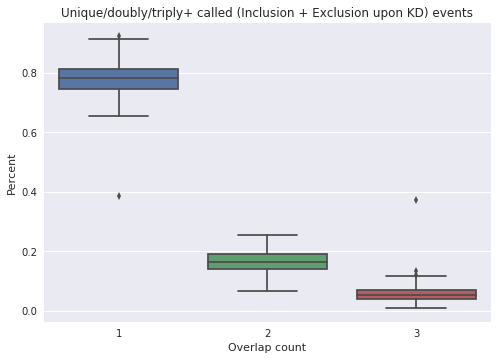

In [7]:
sns.boxplot(merged)
plt.title("Unique/doubly/triply+ called (Inclusion + Exclusion upon KD) events")
plt.ylabel("Percent")
plt.xlabel("Overlap count")

# find some examples
- AQR seems like an outlier

In [14]:
merged[3].sort_values(ascending=False).head(25)

AQR-BGKLV38-K562-SE.MATS.JunctionCountOnly.negative.txt         0.372177
AQR-BGKLV38-K562                                                0.133174
PUF60-BGKLV25-K562-SE.MATS.JunctionCountOnly.negative.txt       0.119500
TARDBP-LV11-K562-SE.MATS.JunctionCountOnly.negative.txt         0.117268
PUS1-BGKLV32-K562-SE.MATS.JunctionCountOnly.negative.txt        0.110988
SRFBP1-BGHLV37-HepG2-SE.MATS.JunctionCountOnly.negative.txt     0.107928
EWSR1-BGHLV31-HepG2-SE.MATS.JunctionCountOnly.negative.txt      0.105516
EIF4A3-LV08-K562-SE.MATS.JunctionCountOnly.negative.txt         0.104096
RBM22-BGHLV37-HepG2-SE.MATS.JunctionCountOnly.negative.txt      0.103359
APOBEC3C-BGKLV25-K562-SE.MATS.JunctionCountOnly.negative.txt    0.102941
PRPF8-BGKLV19-K562-SE.MATS.JunctionCountOnly.negative.txt       0.102851
AKAP8L-BGHLV31-HepG2                                            0.102804
SF3A3-BGHLV33-HepG2-SE.MATS.JunctionCountOnly.negative.txt      0.101983
SF3A3-BGKLV34-K562                                 

In [24]:

wd = '/projects/ps-yeolab3/bay001/maps/current_annotations/se/'
i = os.path.join(wd,'PRPF8-BGKLV19-K562-SE.MATS.JunctionCountOnly.negative.txt')
o = '/projects/ps-yeolab3/bay001/tmp/test.jxc'
annotation_df = subset.run_subset_rmats_junctioncountonly(i, o, e)
annotation_df.head()

,chrom,start,end,name
0,chr1,1154013,1158623,"593,658,700,712,718"
1,chr1,1250998,1255835,1452
2,chr1,1422048,1424583,514
3,chr1,1684499,1685722,"436,223,196"
4,chr1,1770677,1822258,1185


In [25]:
p = 3
f = 3

aqr_peak = '/home/elvannostrand/data/clip/CLIPseq_analysis/ENCODE_FINALforpapers_20170325/278_01.basedon_278_01.peaks.l2inputnormnew.bed.compressed.bed'
peak_df = pd.read_table(aqr_peak, names=['chrom','start','end','l10p','l2fc','strand'])
peak_df = peak_df[(peak_df['l10p']>p) & (peak_df['l2fc']>f)]
peak_df.head()

,chrom,start,end,l10p,l2fc,strand
0,chr7,155094582,155094719,42.149299,4.360483,+
1,chr7,139045219,139045321,36.957031,3.621038,+
2,chr7,141445434,141445523,33.109965,4.451874,+
3,chr7,2406070,2406140,32.149501,4.269566,+
4,chr7,139045069,139045167,26.915031,3.108056,+


In [26]:
import pybedtools
peak_bt = pybedtools.BedTool.from_dataframe(peak_df)
annotation_bt = pybedtools.BedTool.from_dataframe(annotation_df)

In [27]:
peak_bt.intersect(annotation_bt, wb=True).to_dataframe()

,chrom,start,end,name,score,strand,thickStart,thickEnd,itemRgb,blockCount
0,chr7,155473602,155473670,16.891927,4.696987,+,chr7,155473602,155493466,1423
1,chr7,142962250,142962339,15.480054,3.535706,+,chr7,142962185,142964709,"1264,881"
2,chr7,128489664,128489763,12.023343,3.253935,+,chr7,128489632,128490437,1083
3,chr7,86795899,86795984,8.078210,3.125830,+,chr7,86794366,86800310,1450
4,chr7,128490194,128490256,6.407945,3.066937,+,chr7,128489632,128490437,1083
5,chr7,883223,883276,6.353442,3.520109,+,chr7,881767,888054,976
6,chr7,151046326,151046392,5.332144,4.581510,+,chr7,151042552,151048509,639
7,chr7,882850,882883,5.332144,4.581510,+,chr7,881767,888054,976
8,chr7,86823418,86823484,5.322959,3.318475,+,chr7,86823418,86824346,422
9,chr7,92164387,92164463,4.960130,4.488400,+,chr7,92161863,92166164,1075


In [30]:
unmerged_annotation_df = pd.read_table(i)
unmerged_annotation_df[unmerged_annotation_df['upstreamEE']==6600345]

,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
1121,65553,ENSG00000037474.10,NSUN2,chr5,-,6602486,6602613,6599351,6600345,6604250,...,"20,14","205,267","0,5",197,99,0.001089,0.039995,"0.897,0.924","1.0,0.964",-0.071
1124,65569,ENSG00000037474.10,NSUN2,chr5,-,6602508,6602613,6599351,6600345,6604250,...,"20,14","205,267","0,5",197,99,0.001104,0.040418,"0.896,0.924","1.0,0.964",-0.072
1173,65552,ENSG00000037474.10,NSUN2,chr5,-,6602573,6602817,6599353,6600345,6604250,...,"20,14","204,249","0,5",197,99,0.001341,0.046480,"0.892,0.924","1.0,0.962",-0.073
1182,65542,ENSG00000037474.10,NSUN2,chr5,-,6602573,6602706,6599512,6600345,6604250,...,"20,14","204,249","0,5",197,99,0.001400,0.048128,"0.893,0.925","1.0,0.962",-0.072
